# Analyzing suicides
### Data Analysis with Python: Zero to Pandas - Course Project Guidelines

### Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

### Inspiration
Suicide Prevention.

In [158]:
project_name = "zerotopandas-course-project-starter" # change this

In [159]:
!pip install jovian --upgrade -q

In [160]:
import jovian

In [161]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lamoz9ra/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter


'https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

 1.           Загрузить исходные данные data.csv

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

df = pd.read_csv('data.csv')
df.head(5)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

Some info about dataframe

In [163]:
df.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


**Now we shoud try clear and transform the data.**

In [166]:
# Divide country-year into country and year
df["year"] = df["country-year"].str[-4:].astype("int")
df["country"] = df["country-year"].str[:-4]



try:
#     gdp_for_year - not a number, converting
    df.rename({' gdp_for_year ($) ' : 'gdp_for_year ($)'}, axis=1, inplace=True)
    df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(",","").astype("int64")
except Exception as e:
    pass
# A lot of missing values. Replace them by 0
df["HDI for year"] = df["HDI for year"].fillna(0)

df.sample(15)

sex          age  suicides_no  population  suicides/100k pop  \
24908    male  35-54 years          267     1213413              22.00   
24836  female    75+ years          107      355144              30.13   
19717    male  55-74 years           61      203700              29.95   
4083   female   5-14 years            0       38304               0.00   
15000    male  15-24 years           34      129182              26.32   
7119   female   5-14 years            1      735500               0.14   
6909   female    75+ years           56      400826              13.97   
15793    male  25-34 years            0       44119               0.00   
16312  female   5-14 years            2       94400               2.12   
4558     male  55-74 years          314      881400              35.63   
14122    male  35-54 years            1        7127              14.03   
5171     male  25-34 years          362     2220384              16.30   
2897     male  15-24 years            0       26000               0.00   
2765   female    75+ years            0        3126               0.00   
3837   female  15-24 years            0       19271               0.00   

             country-year  HDI for year  gdp_for_year ($)  gdp_per_capita ($)  \
24908     Switzerland2010         0.924      583782977866               78474   
24836     Switzerland2004         0.000      394163688621               56123   
19717     Puerto Rico1988         0.000       26385800000                8155   
4083           Belize2010         0.710        1397113450                4923   
15000          Latvia2012         0.813       28119996053               14558   
7119   Czech Republic1991         0.000       29675502270                3070   
6909             Cuba2015         0.000       87132800000                8044   
15793        Maldives2010         0.683        2588176055                7806   
16312       Mauritius1995         0.647        4040345933                4115   
4558         Bulgaria1986         0.000       20249294118                2413   
14122        Kiribati1997         0.000          67537480                 988   
5171           Canada2006         0.000     1315415197461               42566   
2897         Barbados1985         0.700        1417575550                6137   
2765          Bahrain2004         0.000       13150166755               17497   
3837           Belize1989         0.000         363150000                2372   

            generation  year         country  
24908     Generation X  2010     Switzerland  
24836           Silent  2004     Switzerland  
19717  G.I. Generation  1988     Puerto Rico  
4083      Generation Z  2010          Belize  
15000       Millenials  2012          Latvia  
7119        Millenials  1991  Czech Republic  
6909            Silent  2015            Cuba  
15793     Generation X  2010        Maldives  
16312       Millenials  1995       Mauritius  
4558   G.I. Generation  1986        Bulgaria  
14122          Boomers  1997        Kiribati  
5171      Generation X  2006          Canada  
2897      Generation X  1985        Barbados  
2765            Silent  2004         Bahrain  
3837      Generation X  1989          Belize

Now we have correct year and country and can drop column 'country-year'

In [167]:
df.drop('country-year', axis=1, inplace=True)

#### Using ProfileReport instead of doing everything by hand

If we want to see some information about our dataframe, we can use ProfileReport. It give us some information and understanding about data.

In [168]:
#!pip install pandas_profiling

In [169]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [170]:
pandas_profiling.ProfileReport(df)

In [171]:
import jovian

In [172]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lamoz9ra/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter


'https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

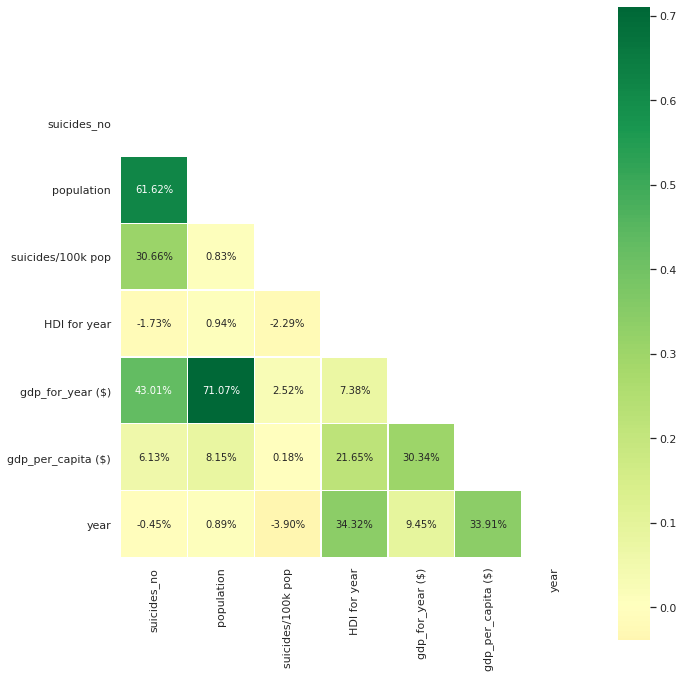

In [173]:
# Let's look on corr between columns
plt.figure(figsize = (10,10))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.2%",
        linewidths=0.2,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

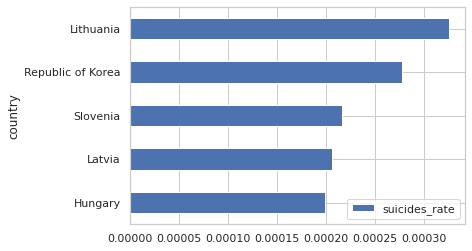

In [174]:
#Top 5 countries with suicide rate in 2015
df_suicides_in_2015=df[df['year']==2015][['country','suicides_no','population']].groupby(['country']).sum()
df_suicides_in_2015['suicides_rate']=df_suicides_in_2015.suicides_no / df_suicides_in_2015.population
df_suicides_in_2015.sort_values('suicides_rate',ascending=True).tail(5).plot.barh(y='suicides_rate');


In [175]:
import jovian

In [176]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lamoz9ra/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter


'https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter'

## Asking and Answering Questions


1. Let's check if there is a difference in suicides rate between the sexes

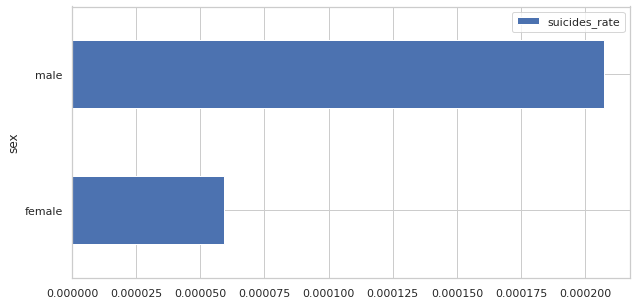

In [177]:
df_suicides_between_sexes=df[['sex','suicides_no','population']].groupby(['sex']).sum()
df_suicides_between_sexes['suicides_rate']=df_suicides_between_sexes.suicides_no / df_suicides_between_sexes.population
df_suicides_between_sexes.sort_values('suicides_rate',ascending=True).plot.barh(y='suicides_rate',figsize=(10,5));

2. Let's include the age range

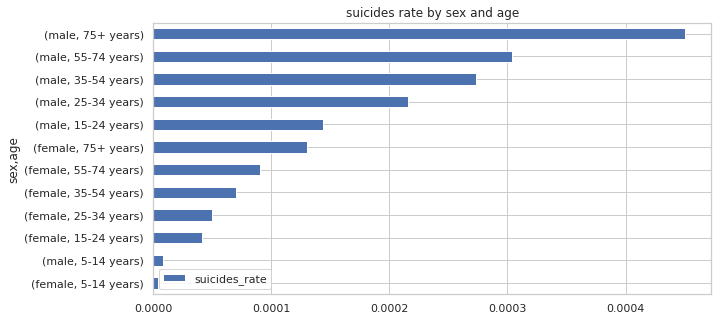

In [178]:
df_suicides_between_sexes_age=df[['sex','age','suicides_no','population']].groupby(['sex','age']).sum()
df_suicides_between_sexes_age['suicides_rate']=df_suicides_between_sexes_age.suicides_no / df_suicides_between_sexes_age.population
df_suicides_between_sexes_age.sort_values('suicides_rate',ascending=True).plot.barh(y='suicides_rate',figsize=(10,5), title='suicides rate by sex and age');

3. Now let's check smth about GDP and suicides rate 

In [179]:
df_suicides=df[['country','population','gdp_for_year ($)','suicides_no']].groupby(['country']).agg({'population':'sum', 'suicides_no':'sum', 'gdp_for_year ($)':'mean'})
df_suicides['suicides_rate']=df_suicides.suicides_no / df_suicides.population * 100
df_suicides

population  suicides_no  gdp_for_year ($)  suicides_rate
country                                                                       
Albania                 62325467         1970      5.211661e+09       0.003161
Antigua and Barbuda      1990228           11      8.035452e+08       0.000553
Argentina             1035985431        82219      2.742565e+11       0.007936
Armenia                 77348173         1905      5.386592e+09       0.002463
Aruba                    1259677          101      2.196223e+09       0.008018
...                          ...          ...               ...            ...
United Arab Emirates    36502275          622      2.532432e+11       0.001704
United Kingdom        1738767780       136805      1.816067e+12       0.007868
United States         8054027201      1034013      1.051071e+13       0.012838
Uruguay                 84068943        13138      2.337827e+10       0.015628
Uzbekistan             486422532        34803      2.286003e+10       0.007155

[101 rows x 4 columns]

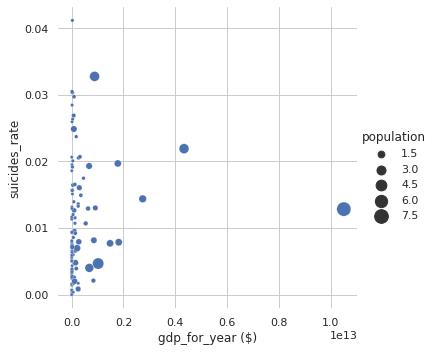

In [180]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_suicides,
    x="gdp_for_year ($)", y="suicides_rate",
    size="population",
    palette=cmap, sizes=(10, 200), legend='auto'
)
#g.set(xscale="log", yscale="log")
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

As we can see there is no difference between rate and gdp in absolute

4. let's find the trend through the years

In [181]:
df_suicides_years=df[['year','population','gdp_for_year ($)','suicides_no']].groupby(['year']).agg({'population':'sum', 'suicides_no':'sum', 'gdp_for_year ($)':'mean'})

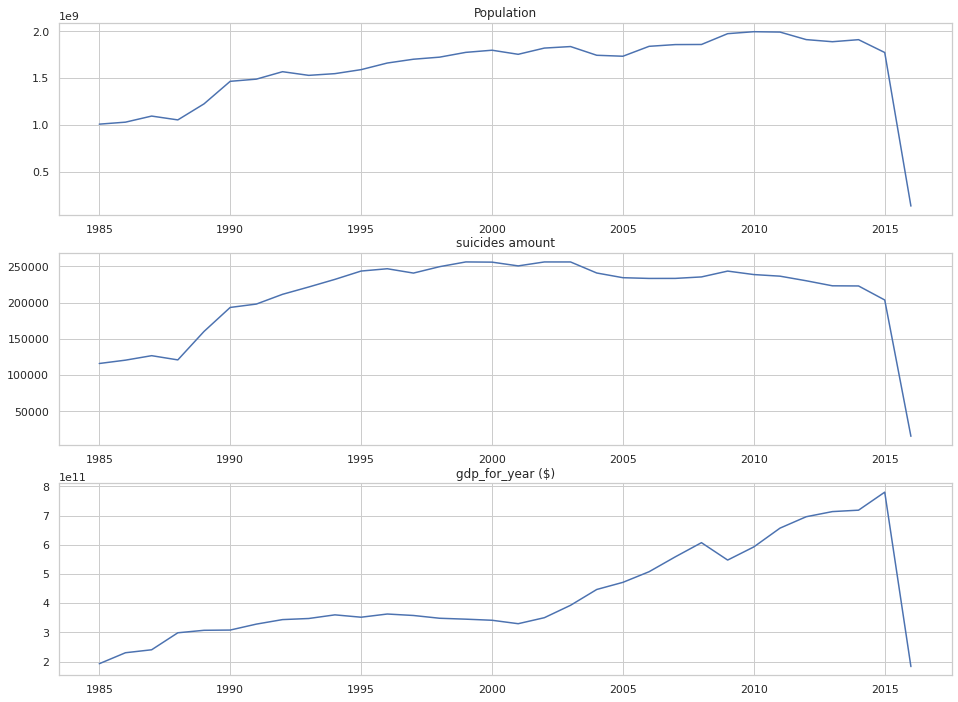

In [182]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
axes[0].plot(df_suicides_years.population)
axes[0].set_title('Population')
axes[1].plot(df_suicides_years.suicides_no)
axes[1].set_title('suicides amount')
axes[2].plot(df_suicides_years['gdp_for_year ($)'])
axes[2].set_title('gdp_for_year ($)');


We can see, that there is no enough data for 2016. Let's drop that year:

In [183]:
df_suicides_years=df[df['year']!=2016][['year','population','gdp_for_year ($)','suicides_no']].groupby(['year']).agg({'population':'sum', 'suicides_no':'sum', 'gdp_for_year ($)':'mean'})

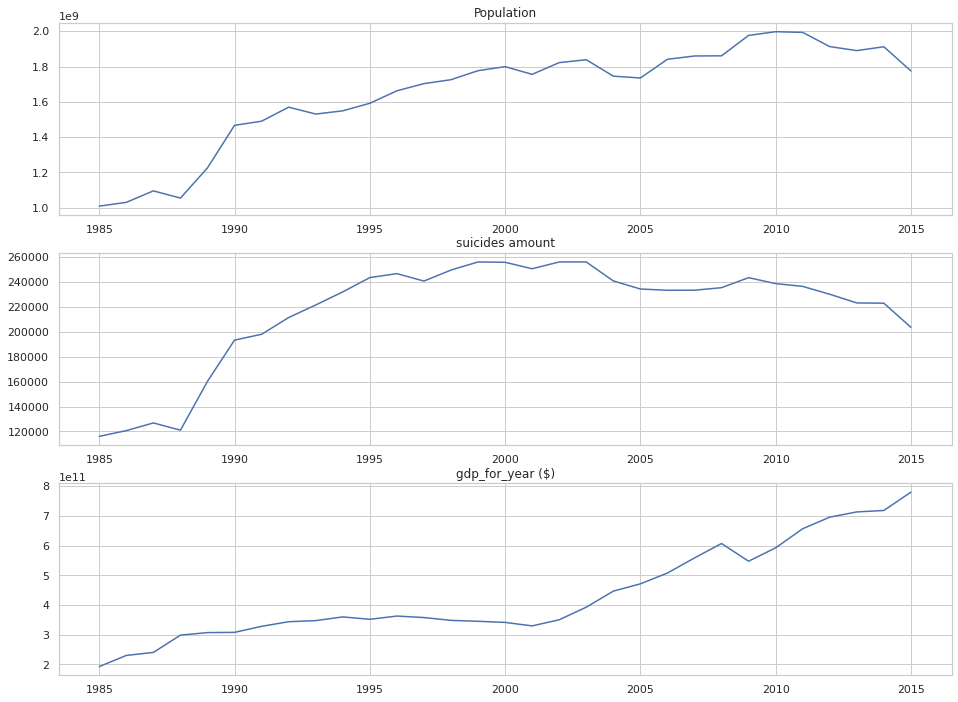

In [184]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
axes[0].plot(df_suicides_years.population)
axes[0].set_title('Population')
axes[1].plot(df_suicides_years.suicides_no)
axes[1].set_title('suicides amount')
axes[2].plot(df_suicides_years['gdp_for_year ($)'])
axes[2].set_title('gdp_for_year ($)');


5. We visualize the division by country depending on the number of suicides

<AxesSubplot:ylabel='suicides_no'>

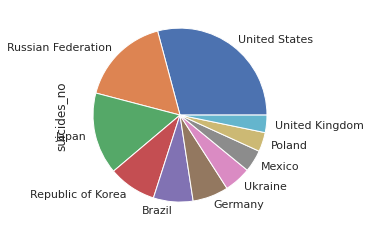

In [188]:
df_suicides_country_pie=df[df['year']==2015][['country','suicides_no','population']].groupby(['country']).agg({'suicides_no':'sum','population':'sum'})
df_suicides_country_pie.sort_values('suicides_no',ascending=False).suicides_no.head(10).plot.pie()

In [189]:
df_suicides_country_pie['suicides_rate'] = df_suicides_country_pie.suicides_no / df_suicides_country_pie.population * 100
df_suicides_country_pie.sort_values('suicides_no',ascending=False).head(10)

suicides_no  population  suicides_rate
country                                                   
United States             44189   300078511       0.014726
Russian Federation        25432   137018943       0.018561
Japan                     23092   120376310       0.019183
Republic of Korea         13510    48671752       0.027757
Brazil                    11163   191087085       0.005842
Germany                   10088    78136683       0.012911
Ukraine                    7574    40345446       0.018773
Mexico                     6234   114357884       0.005451
Poland                     5420    36086575       0.015019
United Kingdom             4910    61082942       0.008038

In [190]:
import jovian

In [191]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lamoz9ra/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter


'https://jovian.ml/lamoz9ra/zerotopandas-course-project-starter'

## Inferences and Conclusion


We've drawn many interesting inferences from the survey, here's a summary of the few of them:

* We learned that there is a difference in the number of suicides between men and women.

* We learned that with the increase in population and the growing number of suicides.

* Saw that there is no consistent relationship between GDP growth and suicide

and much more

## References and Future Work

Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [13]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
